In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np

# Prepare for dataset

In [ ]:
import pandas as pd
train = pd.read_csv('drive/MyDrive/XenseDataset_2_0/train.csv')
val = pd.read_csv('drive/MyDrive/XenseDataset_2_0/val.csv')

In [ ]:
train_dataset = train["dataset"]
train_image = train["image"]
train_label = train["label"]
train_color = train["color"]
train_brand = train["brand"]

val_dataset = val["dataset"]
val_image = val["image"]
val_label = val["label"]
val_color = val["color"]
val_brand = val["brand"]

In [ ]:
train.groupby('label')['image'].nunique()

label
Bus         22
Car        719
Caravan      3
Pickup      10
Trailer     40
Truck      147
Van        148
Name: image, dtype: int64

In [ ]:
train.groupby('color')['image'].nunique()

color
Black     262
Blue       75
Brown       8
Copper      2
Gray        9
Green       8
Grey      128
Orange      7
Red        78
Silver    137
White     367
Yellow      8
Name: image, dtype: int64

In [ ]:
train.groupby('brand')['image'].nunique()

brand
Audi           49
BMW            34
Chevrolet       1
Citroen        15
DAF             2
Dacia           3
Daf             1
Ducia           3
Fiat            6
Ford           46
Honda          16
Hyundai         8
Isuzu           1
Iveco           2
Jeep            3
Kia            31
Land rover      1
Lexus           3
MAN             5
Man            24
Mazda          11
Mercedes       45
Mg              4
Mini            2
Mitsubishi     13
Mustang         1
Nissan         21
Opel           19
Peugeot        23
Porsche         1
Renault        27
Renualt        16
SAAB            9
SEAT            1
Scania         58
Seat            5
Skoda          19
Subaru          5
Tesla           1
Toyota         58
Unkown        159
Volkswagen    150
Volvo         187
Name: image, dtype: int64

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

train_img= np.random.randint(1,100, size=(len(train_image), 32, 32, 3))
val_img= np.random.randint(1,100, size=(len(val_image), 32, 32, 3))

for i in range(len(train_image)):
  img = load_img("drive/MyDrive/XenseDataset_2_0/" + train_dataset[i] + "/" + train_image[i])
  img = img.resize((32,32))
  data = img_to_array(img)
  train_img[i] = data


for i in range(len(val_image)):
  img = load_img("drive/MyDrive/XenseDataset_2_0/" + val_dataset[i] + "/" + val_image[i])
  img = img.resize((32,32))
  data = img_to_array(img)
  val_img[i] = data

In [ ]:
# 64*64, 96*96

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

train_img= np.random.randint(1,100, size=(len(train_image), 96, 96, 3))
val_img= np.random.randint(1,100, size=(len(val_image), 96, 96, 3))

for i in range(len(train_image)):
  img = load_img("drive/MyDrive/XenseDataset_2_0/" + train_dataset[i] + "/" + train_image[i])
  img = img.resize((96,96))
  data = img_to_array(img)
  train_img[i] = data


for i in range(len(val_image)):
  img = load_img("drive/MyDrive/XenseDataset_2_0/" + val_dataset[i] + "/" + val_image[i])
  img = img.resize((96,96))
  data = img_to_array(img)
  val_img[i] = data

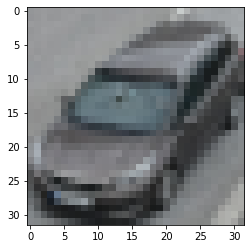

In [ ]:
pyplot.imshow(train_img[3])

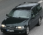

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

img = load_img("drive/MyDrive/XenseDataset_2_0/" + train_dataset[1] + "/" + train_image[1])
img

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

train_img_rotate= np.random.randint(1,100, size=((9*len(train_image)), 32, 32, 3))
train_label_rotate = []
train_color_rotate = []
train_brand_rotate = []


for i in range(len(train_image)):
  img = load_img("drive/MyDrive/XenseDataset_2_0/" + train_dataset[i] + "/" + train_image[i])
  img = img.resize((32,32))
  data = img_to_array(img)
  # expand dimension to one sample
  samples = expand_dims(data, 0)
  # create image data augmentation generator
  datagen = ImageDataGenerator(rotation_range=90)
  # prepare iterator
  it = datagen.flow(samples, batch_size=1)
  # generate samples and plot
  for j in range(9):
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    train_img_rotate[(9*i+j)] = batch[0].astype('uint8')
    train_label_rotate.append(train_label[i])
    train_color_rotate.append(train_color[i])
    train_brand_rotate.append(train_brand[i])

In [ ]:
# 64*64, 96*96
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

train_img_rotate= np.random.randint(1,100, size=((9*len(train_image)), 96, 96, 3))
train_brand_rotate = []
#val_img= np.random.randint(1,100, size=((9*len(val_image)), 32, 32, 3))


for i in range(len(train_image)):
  img = load_img("drive/MyDrive/XenseDataset_2_0/" + train_dataset[i] + "/" + train_image[i])
  img = img.resize((96,96))
  data = img_to_array(img)
  # expand dimension to one sample
  samples = expand_dims(data, 0)
  # create image data augmentation generator
  datagen = ImageDataGenerator(rotation_range=90)
  # prepare iterator
  it = datagen.flow(samples, batch_size=1)
  # generate samples and plot
  for j in range(9):
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    train_img_rotate[(9*i+j)] = batch[0].astype('uint8')
    train_brand_rotate.append(train_brand[i])


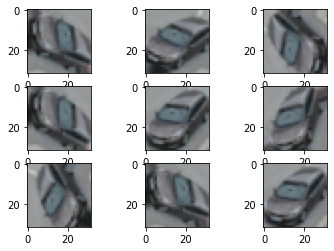

In [ ]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	# plot raw pixel data
	pyplot.imshow(train_img_rotate[(27+i)])
# show the figure
pyplot.show()

# Label Classification

In [ ]:
train_label_distribution = train.groupby('label')['image'].nunique()
val_label_distribution = val.groupby('label')['image'].nunique()
label_distribution = pd.merge(train_label_distribution,
                 val_label_distribution,
                 on='label')

label_distribution.columns = ['train','val']


label_distribution["percentage"] = label_distribution["val"]/(label_distribution["train"] + label_distribution["val"])

label_distribution.sort_values(by="train", ascending=False)

,train,val,percentage
label,,,
Car,719,309,0.300584
Van,148,63,0.298578
Truck,147,63,0.300000
Trailer,40,17,0.298246
Bus,22,9,0.290323
Pickup,10,4,0.285714
Caravan,3,2,0.400000


In [ ]:
label_list = train_label.unique()
label_class = []
for i in range(len(label_list)):
  label_class.append(i)

label = {'Label':label_list, 'Class': label_class}
label = pd.DataFrame(label)
label

,Label,Class
0,Car,0
1,Van,1
2,Truck,2
3,Caravan,3
4,Trailer,4
5,Bus,5
6,Pickup,6


In [ ]:
label_list = train_label.unique()

train_label_list = np.random.randint(1,7, size=(len(train_label), 1))
val_label_list = np.random.randint(1,7, size=(len(val_label), 1))

for i in range(len(train_label)):
  if train_label[i] == label_list[0]:
    train_label_list[i] = 0
  if train_label[i] == label_list[1]:
    train_label_list[i] = 1
  if train_label[i] == label_list[2]:
    train_label_list[i] = 2
  if train_label[i] == label_list[3]:
    train_label_list[i] = 3
  if train_label[i] == label_list[4]:
    train_label_list[i] = 4
  if train_label[i] == label_list[5]:
    train_label_list[i] = 5
  if train_label[i] == label_list[6]:
    train_label_list[i] = 6

for i in range(len(val_label)):
  if val_label[i] == label_list[0]:
    val_label_list[i] = 0
  if val_label[i] == label_list[1]:
    val_label_list[i] = 1
  if val_label[i] == label_list[2]:
    val_label_list[i] = 2
  if val_label[i] == label_list[3]:
    val_label_list[i] = 3
  if val_label[i] == label_list[4]:
    val_label_list[i] = 4
  if val_label[i] == label_list[5]:
    val_label_list[i] = 5
  if val_label[i] == label_list[6]:
    val_label_list[i] = 6


In [ ]:
model_label = models.Sequential()
model_label.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_label.add(layers.MaxPooling2D((2, 2)))
model_label.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_label.add(layers.MaxPooling2D((2, 2)))
model_label.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model_label.add(layers.Flatten())
model_label.add(layers.Dense(64, activation='relu'))
model_label.add(layers.Dense(7))

In [ ]:
model_label.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model_label.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_label.fit(train_img, train_label_list, epochs=20, 
                    validation_data=(val_img, val_label_list))

Epoch 1/20
35/35 [==============================] - 2s 57ms/step - loss: 6.3409 - accuracy: 0.5326 - val_loss: 1.1823 - val_accuracy: 0.6360
Epoch 2/20
35/35 [==============================] - 2s 52ms/step - loss: 0.9987 - accuracy: 0.6657 - val_loss: 1.0416 - val_accuracy: 0.6595
Epoch 3/20
35/35 [==============================] - 2s 52ms/step - loss: 0.8232 - accuracy: 0.7218 - val_loss: 0.8715 - val_accuracy: 0.7238
Epoch 4/20
35/35 [==============================] - 2s 50ms/step - loss: 0.7254 - accuracy: 0.7603 - val_loss: 0.8343 - val_accuracy: 0.7473
Epoch 5/20
35/35 [==============================] - 2s 51ms/step - loss: 0.5867 - accuracy: 0.7980 - val_loss: 0.7603 - val_accuracy: 0.7837
Epoch 6/20
35/35 [==============================] - 2s 52ms/step - loss: 0.4731 - accuracy: 0.8393 - val_loss: 0.7411 - val_accuracy: 0.7923
Epoch 7/20
35/35 [==============================] - 2s 52ms/step - loss: 0.7153 - accuracy: 0.7530 - val_loss: 0.8215 - val_accuracy: 0.7323
Epoch 8/20
35

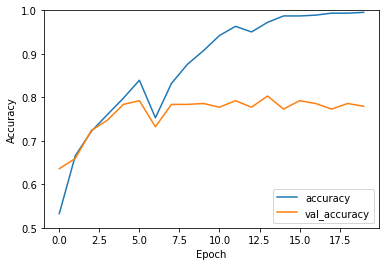

15/15 - 0s - loss: 1.2818 - accuracy: 0.7794 - 212ms/epoch - 14ms/step


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model_label.evaluate(val_img,  val_label_list, verbose=2)

With rotation

In [ ]:
label_list = train_label.unique()

train_label_list = np.random.randint(1, 7, size=(len(train_label_rotate), 1))
val_label_list = np.random.randint(1, 7, size=(len(val_label), 1))

for i in range(len(train_label_rotate)):
  for j in range(len(label_list)):
    if train_label_rotate[i] == label_list[j]:
      train_label_list[i] = j

for i in range(len(val_label)):
  for j in range(len(label_list)):
    if val_label[i] == label_list[j]:
      val_label_list[i] = j

In [ ]:
model_label.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_label.fit(train_img_rotate, train_label_list, epochs=20, 
                    validation_data=(val_img, val_label_list))

Epoch 1/20
307/307 [==============================] - 14s 44ms/step - loss: 1.4072 - accuracy: 0.6450 - val_loss: 1.0627 - val_accuracy: 0.6531
Epoch 2/20
307/307 [==============================] - 14s 45ms/step - loss: 0.8434 - accuracy: 0.7063 - val_loss: 0.9712 - val_accuracy: 0.7045
Epoch 3/20
307/307 [==============================] - 14s 46ms/step - loss: 0.7070 - accuracy: 0.7556 - val_loss: 0.8790 - val_accuracy: 0.7366
Epoch 4/20
307/307 [==============================] - 13s 43ms/step - loss: 0.5814 - accuracy: 0.7978 - val_loss: 0.9411 - val_accuracy: 0.7216
Epoch 5/20
307/307 [==============================] - 13s 43ms/step - loss: 0.5032 - accuracy: 0.8265 - val_loss: 0.9397 - val_accuracy: 0.7516
Epoch 6/20
307/307 [==============================] - 13s 43ms/step - loss: 0.4129 - accuracy: 0.8544 - val_loss: 0.9729 - val_accuracy: 0.7452
Epoch 7/20
307/307 [==============================] - 13s 43ms/step - loss: 0.3549 - accuracy: 0.8751 - val_loss: 1.2107 - val_accuracy:

In [ ]:
model_label.save("label_model_ShuzhouLiu_HangSu.h5")

In [ ]:
val_label_list[200]

array([0])

In [ ]:
model_label.evaluate(val_img, val_label_list)


15/15 [==============================] - 0s 25ms/step - loss: 3.3904 - accuracy: 0.7452


[3.3904356956481934, 0.7451820373535156]

# Color Classification

In [ ]:
train_color_distribution = train.groupby('color')['image'].nunique()
val_lcolor_distribution = val.groupby('color')['image'].nunique()
color_distribution = pd.merge(train_color_distribution,
                 val_lcolor_distribution,
                 on='color')

color_distribution.columns = ['train','val']


color_distribution["percentage"] = color_distribution["val"]/(color_distribution["train"] + color_distribution["val"])

color_distribution.sort_values(by="train", ascending=False)

,train,val,percentage
color,,,
White,367,159,0.302281
Black,262,109,0.293801
Silver,137,56,0.290155
Grey,128,53,0.292818
Red,78,34,0.303571
Blue,75,29,0.278846
Gray,9,7,0.437500
Brown,8,1,0.111111
Green,8,5,0.384615


In [ ]:
color_list = train_color.unique()
color_class = []
for i in range(len(color_list)):
  color_class.append(i)

color = {'Color':color_list, 'Class': color_class}
color = pd.DataFrame(color)
color

,Color,Class
0,White,0
1,Green,1
2,Black,2
3,Brown,3
4,Silver,4
5,Blue,5
6,Orange,6
7,Red,7
8,Grey,8
9,Gray,9


In [ ]:
color_list = train_color.unique()

train_color_list = np.random.randint(1, 12, size=(len(train_label), 1))
val_color_list = np.random.randint(1, 12, size=(len(val_label), 1))

for i in range(len(train_color)):
  if train_color[i] == color_list[0]:
    train_color_list[i] = 0
  if train_color[i] == color_list[1]:
    train_color_list[i] = 1
  if train_color[i] == color_list[2]:
    train_color_list[i] = 2
  if train_color[i] == color_list[3]:
    train_color_list[i] = 3
  if train_color[i] == color_list[4]:
    train_color_list[i] = 4
  if train_color[i] == color_list[5]:
    train_color_list[i] = 5
  if train_color[i] == color_list[6]:
    train_color_list[i] = 6
  if train_color[i] == color_list[7]:
    train_color_list[i] = 7
  if train_color[i] == color_list[8]:
    train_color_list[i] = 8
  if train_color[i] == color_list[9]:
    train_color_list[i] = 9
  if train_color[i] == color_list[10]:
    train_color_list[i] = 10
  if train_color[i] == color_list[11]:
    train_color_list[i] = 11

for i in range(len(val_color)):
  if val_color[i] == color_list[0]:
    val_color_list[i] = 0
  if val_color[i] == color_list[1]:
    val_color_list[i] = 1
  if val_color[i] == color_list[2]:
    val_color_list[i] = 2
  if val_color[i] == color_list[3]:
    val_color_list[i] = 3
  if val_color[i] == color_list[4]:
    val_color_list[i] = 4
  if val_color[i] == color_list[5]:
    val_color_list[i] = 5
  if val_color[i] == color_list[6]:
    val_color_list[i] = 6
  if val_color[i] == color_list[7]:
    val_color_list[i] = 7
  if val_color[i] == color_list[8]:
    val_color_list[i] = 8
  if val_color[i] == color_list[9]:
    val_color_list[i] = 9
  if val_color[i] == color_list[10]:
    val_color_list[i] = 10
  if val_color[i] == color_list[11]:
    val_color_list[i] = 11


In [ ]:
model_color = models.Sequential()
model_color.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_color.add(layers.MaxPooling2D((2, 2)))
model_color.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_color.add(layers.MaxPooling2D((2, 2)))
model_color.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model_color.add(layers.Flatten())
model_color.add(layers.Dropout(0.1))
model_color.add(layers.Dense(64, activation='relu'))
model_color.add(layers.Dense(12))

In [ ]:
model_color.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

In [ ]:
model_color.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_color.fit(train_img, train_color_list, epochs=50, 
                    validation_data=(val_img, val_color_list))

Epoch 1/50
35/35 [==============================] - 2s 54ms/step - loss: 3.7626 - accuracy: 0.3471 - val_loss: 1.7469 - val_accuracy: 0.4261
Epoch 2/50
35/35 [==============================] - 2s 49ms/step - loss: 1.4646 - accuracy: 0.5115 - val_loss: 1.4472 - val_accuracy: 0.5460
Epoch 3/50
35/35 [==============================] - 2s 49ms/step - loss: 1.2433 - accuracy: 0.5822 - val_loss: 2.0545 - val_accuracy: 0.4475
Epoch 4/50
35/35 [==============================] - 2s 49ms/step - loss: 1.3054 - accuracy: 0.5583 - val_loss: 1.6531 - val_accuracy: 0.4582
Epoch 5/50
35/35 [==============================] - 2s 48ms/step - loss: 1.1511 - accuracy: 0.6051 - val_loss: 1.2757 - val_accuracy: 0.6060
Epoch 6/50
35/35 [==============================] - 2s 49ms/step - loss: 1.0112 - accuracy: 0.6593 - val_loss: 1.2136 - val_accuracy: 0.6124
Epoch 7/50
35/35 [==============================] - 2s 49ms/step - loss: 0.8746 - accuracy: 0.6979 - val_loss: 1.1746 - val_accuracy: 0.6296
Epoch 8/50
35

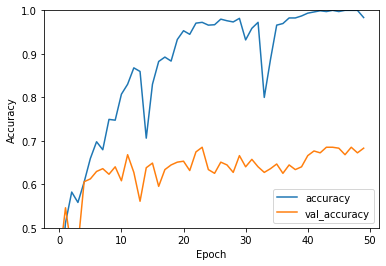

15/15 - 0s - loss: 2.0961 - accuracy: 0.6831 - 195ms/epoch - 13ms/step


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model_color.evaluate(val_img,  val_color_list, verbose=2)

With rotation

In [ ]:
color_list = train_color.unique()

train_color_list = np.random.randint(1, 7, size=(len(train_color_rotate), 1))
val_color_list = np.random.randint(1, 7, size=(len(val_color), 1))

for i in range(len(train_color_rotate)):
  for j in range(len(color_list)):
    if train_color_rotate[i] == color_list[j]:
      train_color_list[i] = j

for i in range(len(val_color)):
  for j in range(len(color_list)):
    if val_color[i] == color_list[j]:
      val_color_list[i] = j

In [ ]:
model_color.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_color.fit(train_img_rotate, train_color_list, epochs=50, 
                    validation_data=(val_img, val_color_list))

Epoch 1/50
307/307 [==============================] - 16s 49ms/step - loss: 1.9917 - accuracy: 0.4861 - val_loss: 1.2133 - val_accuracy: 0.6296
Epoch 2/50
307/307 [==============================] - 15s 49ms/step - loss: 1.0371 - accuracy: 0.6449 - val_loss: 1.1536 - val_accuracy: 0.6745
Epoch 3/50
307/307 [==============================] - 15s 49ms/step - loss: 0.8503 - accuracy: 0.6982 - val_loss: 1.0796 - val_accuracy: 0.6724
Epoch 4/50
307/307 [==============================] - 15s 48ms/step - loss: 0.7640 - accuracy: 0.7221 - val_loss: 1.0394 - val_accuracy: 0.6788
Epoch 5/50
307/307 [==============================] - 15s 49ms/step - loss: 0.6596 - accuracy: 0.7623 - val_loss: 1.0931 - val_accuracy: 0.6895
Epoch 6/50
307/307 [==============================] - 15s 49ms/step - loss: 0.5762 - accuracy: 0.7861 - val_loss: 1.3491 - val_accuracy: 0.6831
Epoch 7/50
307/307 [==============================] - 15s 49ms/step - loss: 0.5103 - accuracy: 0.8155 - val_loss: 1.3227 - val_accuracy:

In [ ]:
model_color.save("color_model_ShuzhouLiu_HangSu.h5")

# Brand Classification

In [ ]:
brand_list = train_brand.unique()
brand_class = []
for i in range(len(brand_list)):
  brand_class.append(i)

brand = {'Brand':brand_list, 'Class': brand_class}
brand = pd.DataFrame(brand)
brand

,Brand,Class
0,Unkown,0
1,Volvo,1
2,Opel,2
3,Kia,3
4,Volkswagen,4
5,Scania,5
6,Peugeot,6
7,Toyota,7
8,Man,8
9,Renault,9


In [ ]:
brand_list = train_brand.unique()

train_brand_list = np.random.randint(1, 43, size=(len(train_brand), 1))
val_brand_list = np.random.randint(1, 43, size=(len(val_brand), 1))

for i in range(len(train_brand)):
  for j in range(len(brand_list)):
    if train_brand[i] == brand_list[j]:
      train_brand_list[i] = j

for i in range(len(val_brand)):
  for j in range(len(brand_list)):
    if val_brand[i] == brand_list[j]:
      val_brand_list[i] = j

In [ ]:
model_brand = models.Sequential()
model_brand.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_brand.add(layers.MaxPooling2D((2, 2)))
model_brand.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_brand.add(layers.MaxPooling2D((2, 2)))
model_brand.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model_brand.add(layers.Flatten())
model_brand.add(layers.Dense(128, activation='relu'))
model_brand.add(layers.Dense(43))

In [ ]:
model_brand.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

1. original model

In [ ]:
model_brand.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_brand.fit(train_img, train_brand_list, epochs=50, 
                    validation_data=(val_img, val_brand_list))

Epoch 1/50
35/35 [==============================] - 2s 55ms/step - loss: 9.5591 - accuracy: 0.1010 - val_loss: 3.3452 - val_accuracy: 0.1349
Epoch 2/50
35/35 [==============================] - 2s 48ms/step - loss: 3.0869 - accuracy: 0.1699 - val_loss: 3.0391 - val_accuracy: 0.1842
Epoch 3/50
35/35 [==============================] - 2s 49ms/step - loss: 2.8212 - accuracy: 0.2507 - val_loss: 3.0238 - val_accuracy: 0.2077
Epoch 4/50
35/35 [==============================] - 2s 49ms/step - loss: 2.6052 - accuracy: 0.3012 - val_loss: 3.0307 - val_accuracy: 0.2013
Epoch 5/50
35/35 [==============================] - 2s 49ms/step - loss: 2.6153 - accuracy: 0.3076 - val_loss: 3.0705 - val_accuracy: 0.2034
Epoch 6/50
35/35 [==============================] - 2s 49ms/step - loss: 2.4084 - accuracy: 0.3361 - val_loss: 3.0629 - val_accuracy: 0.2184
Epoch 7/50
35/35 [==============================] - 2s 50ms/step - loss: 2.2893 - accuracy: 0.3545 - val_loss: 3.0060 - val_accuracy: 0.2184
Epoch 8/50
35

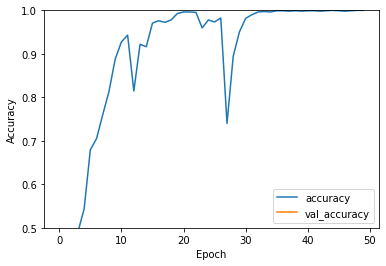

15/15 - 0s - loss: 11.9721 - accuracy: 0.2013 - 232ms/epoch - 15ms/step


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model_brand.evaluate(val_img,  val_brand_list, verbose=2)

2. revised model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(43))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 25600)             0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_img, train_brand_list, epochs=20, 
                    validation_data=(val_img, val_brand_list))

Epoch 1/100
35/35 [==============================] - 2s 55ms/step - loss: 10.7522 - accuracy: 0.0753 - val_loss: 3.5365 - val_accuracy: 0.1049
Epoch 2/100
35/35 [==============================] - 2s 49ms/step - loss: 3.5242 - accuracy: 0.1240 - val_loss: 3.1207 - val_accuracy: 0.1756
Epoch 3/100
35/35 [==============================] - 2s 49ms/step - loss: 3.2445 - accuracy: 0.1644 - val_loss: 3.2426 - val_accuracy: 0.1499
Epoch 4/100
35/35 [==============================] - 2s 49ms/step - loss: 3.3886 - accuracy: 0.1442 - val_loss: 3.1776 - val_accuracy: 0.1478
Epoch 5/100
35/35 [==============================] - 2s 49ms/step - loss: 3.1585 - accuracy: 0.1442 - val_loss: 3.1828 - val_accuracy: 0.1585
Epoch 6/100
35/35 [==============================] - 2s 49ms/step - loss: 3.0697 - accuracy: 0.1644 - val_loss: 2.9790 - val_accuracy: 0.1606
Epoch 7/100
35/35 [==============================] - 2s 49ms/step - loss: 3.0856 - accuracy: 0.1534 - val_loss: 2.9844 - val_accuracy: 0.2034
Epoch

3. With shuffle

In [ ]:
from sklearn.utils import shuffle
train_img_shuffle, train_brand_list_shuffle = shuffle(train_img, train_brand_list)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_img_shuffle, train_brand_list_shuffle, epochs=50, 
                    validation_data=(val_img, val_brand_list))

Epoch 1/50
35/35 [==============================] - 19s 514ms/step - loss: 9.7660 - accuracy: 0.1240 - val_loss: 3.5385 - val_accuracy: 0.1435
Epoch 2/50
35/35 [==============================] - 17s 501ms/step - loss: 3.1686 - accuracy: 0.1928 - val_loss: 3.2863 - val_accuracy: 0.1991
Epoch 3/50
35/35 [==============================] - 18s 503ms/step - loss: 2.6357 - accuracy: 0.2938 - val_loss: 3.1623 - val_accuracy: 0.1863
Epoch 4/50
35/35 [==============================] - 18s 509ms/step - loss: 2.1689 - accuracy: 0.3802 - val_loss: 3.6215 - val_accuracy: 0.2398
Epoch 5/50
35/35 [==============================] - 18s 508ms/step - loss: 1.7885 - accuracy: 0.4848 - val_loss: 3.3487 - val_accuracy: 0.2184
Epoch 6/50
35/35 [==============================] - 18s 507ms/step - loss: 1.5435 - accuracy: 0.5344 - val_loss: 3.8561 - val_accuracy: 0.2313
Epoch 7/50
35/35 [==============================] - 18s 510ms/step - loss: 1.2453 - accuracy: 0.6345 - val_loss: 4.3068 - val_accuracy: 0.2141

In [ ]:
brand_list = train_brand.unique()

train_brand_rotate_list = np.random.randint(1, 43, size=(len(train_brand_rotate), 1))
val_brand_list = np.random.randint(1, 43, size=(len(val_brand), 1))

for i in range(len(train_brand_rotate)):
  for j in range(len(brand_list)):
    if train_brand_rotate[i] == brand_list[j]:
      train_brand_rotate_list[i] = j

for i in range(len(val_brand)):
  for j in range(len(brand_list)):
    if val_brand[i] == brand_list[j]:
      val_brand_list[i] = j

In [ ]:
from sklearn.utils import shuffle
train_img_rotate_shuffle, train_brand_rotate_list_shuffle = shuffle(train_img_rotate, train_brand_rotate_list)

In [ ]:
model_brand.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_brand.fit(train_img_rotate_shuffle, train_brand_rotate_list_shuffle, epochs=50, 
                    validation_data=(val_img, val_brand_list))

Epoch 1/50
307/307 [==============================] - 15s 46ms/step - loss: 3.4716 - accuracy: 0.1672 - val_loss: 3.0233 - val_accuracy: 0.1863
Epoch 2/50
307/307 [==============================] - 14s 46ms/step - loss: 2.7308 - accuracy: 0.2391 - val_loss: 3.0336 - val_accuracy: 0.1756
Epoch 3/50
307/307 [==============================] - 14s 46ms/step - loss: 2.5110 - accuracy: 0.2922 - val_loss: 3.1277 - val_accuracy: 0.2120
Epoch 4/50
307/307 [==============================] - 14s 45ms/step - loss: 2.3131 - accuracy: 0.3403 - val_loss: 3.4869 - val_accuracy: 0.2313
Epoch 5/50
307/307 [==============================] - 14s 46ms/step - loss: 2.0762 - accuracy: 0.3957 - val_loss: 3.4823 - val_accuracy: 0.1970
Epoch 6/50
307/307 [==============================] - 14s 46ms/step - loss: 1.8839 - accuracy: 0.4531 - val_loss: 4.3726 - val_accuracy: 0.2034
Epoch 7/50
307/307 [==============================] - 14s 45ms/step - loss: 1.6520 - accuracy: 0.5142 - val_loss: 4.5072 - val_accuracy:

4. With batchNormalization

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(43))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                      

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_img_rotate_shuffle, train_brand_rotate_list_shuffle, epochs=50, 
                    validation_data=(val_img, val_brand_list))

Epoch 1/50
307/307 [==============================] - 19s 60ms/step - loss: 2.9109 - accuracy: 0.2069 - val_loss: 2.8876 - val_accuracy: 0.2120
Epoch 2/50
307/307 [==============================] - 18s 59ms/step - loss: 2.6219 - accuracy: 0.2608 - val_loss: 2.9212 - val_accuracy: 0.2377
Epoch 3/50
307/307 [==============================] - 18s 59ms/step - loss: 2.4533 - accuracy: 0.2934 - val_loss: 2.8424 - val_accuracy: 0.2570
Epoch 4/50
307/307 [==============================] - 18s 58ms/step - loss: 2.2565 - accuracy: 0.3358 - val_loss: 2.8830 - val_accuracy: 0.2206
Epoch 5/50
307/307 [==============================] - 18s 58ms/step - loss: 2.0725 - accuracy: 0.3737 - val_loss: 3.0041 - val_accuracy: 0.2334
Epoch 6/50
307/307 [==============================] - 18s 58ms/step - loss: 1.9103 - accuracy: 0.4112 - val_loss: 3.0511 - val_accuracy: 0.2355
Epoch 7/50
307/307 [==============================] - 18s 58ms/step - loss: 1.7627 - accuracy: 0.4536 - val_loss: 3.1345 - val_accuracy:

In [ ]:
model.save("brand_model_ShuzhouLiu_HangSu.h5")

In [ ]:
y_pred=model.predict(val_img)


In [ ]:
pred_label = []

for i in range(467):
  m = np.argmax(y_pred[i], axis=0)
  pred_label.append(m)


In [ ]:
true_label = np.reshape(val_brand_list, [467])
true_label = true_label.tolist()


In [ ]:
con_mat = tf.math.confusion_matrix(labels=true_label, predictions=pred_label)

In [ ]:
con_mat

<tf.Tensor: shape=(43, 43), dtype=int32, numpy=
array([[26,  8,  0, ...,  0,  0,  0],
       [17, 36,  0, ...,  0,  0,  0],
       [ 0,  3,  0, ...,  0,  0,  0],
       ...,
       [ 1,  1,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0]], dtype=int32)>

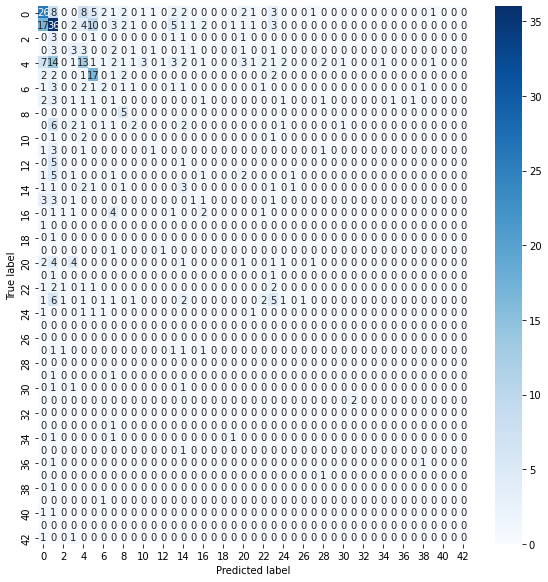

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(43))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                        

In [ ]:
from sklearn.utils import shuffle
train_img_rotate_shuffle, train_brand_rotate_list_shuffle = shuffle(train_img_rotate, train_brand_rotate_list)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_img_rotate_shuffle, train_brand_rotate_list_shuffle, epochs=50, 
                    validation_data=(val_img, val_brand_list))

Epoch 1/10
307/307 [==============================] - 75s 240ms/step - loss: 2.7087 - accuracy: 0.2530 - val_loss: 2.9309 - val_accuracy: 0.2013
Epoch 2/10
307/307 [==============================] - 74s 242ms/step - loss: 2.2130 - accuracy: 0.3620 - val_loss: 3.0412 - val_accuracy: 0.2034
Epoch 3/10
307/307 [==============================] - 74s 239ms/step - loss: 1.6994 - accuracy: 0.4880 - val_loss: 3.2316 - val_accuracy: 0.2463
Epoch 4/10
307/307 [==============================] - 73s 239ms/step - loss: 1.2348 - accuracy: 0.6168 - val_loss: 4.0624 - val_accuracy: 0.2056
Epoch 5/10
307/307 [==============================] - 73s 239ms/step - loss: 0.9585 - accuracy: 0.7028 - val_loss: 3.8467 - val_accuracy: 0.2505
Epoch 6/10
307/307 [==============================] - 74s 240ms/step - loss: 0.7278 - accuracy: 0.7715 - val_loss: 4.3162 - val_accuracy: 0.2291
Epoch 7/10
307/307 [==============================] - 73s 239ms/step - loss: 0.6132 - accuracy: 0.8072 - val_loss: 5.0268 - val_ac

# Revised the dataset

In [ ]:
train_brand_distribution = train.groupby('brand')['image'].nunique()
val_brand_distribution = val.groupby('brand')['image'].nunique()
brand_distribution = pd.merge(train_brand_distribution,
                 val_brand_distribution,
                 on='brand')

brand_distribution.columns = ['train','val']


brand_distribution["percentage"] = brand_distribution["val"]/(brand_distribution["train"] + brand_distribution["val"])
brand_distribution["train_new"] = round((brand_distribution["train"] + brand_distribution["val"])*0.8)
brand_distribution["val_new"] = round((brand_distribution["train"] + brand_distribution["val"])*0.2)

brand_distribution.sort_values(by="percentage", ascending=False)

,train,val,percentage,train_new,val_new
brand,,,,,
Chevrolet,1,2,0.666667,2.0,1.0
Porsche,1,2,0.666667,2.0,1.0
Tesla,1,2,0.666667,2.0,1.0
Land rover,1,2,0.666667,2.0,1.0
Mustang,1,1,0.500000,2.0,0.0
SEAT,1,1,0.500000,2.0,0.0
Daf,1,1,0.500000,2.0,0.0
Isuzu,1,1,0.500000,2.0,0.0
Lexus,3,3,0.500000,5.0,1.0


In [ ]:
brand_distribution.sort_values(by="train", ascending=False)

,train,val,percentage,train_new,val_new
brand,,,,,
Volvo,187,90,0.324910,222.0,55.0
Unkown,159,66,0.293333,180.0,45.0
Volkswagen,150,65,0.302326,172.0,43.0
Scania,58,27,0.317647,68.0,17.0
Toyota,58,14,0.194444,58.0,14.0
Audi,49,12,0.196721,49.0,12.0
Ford,46,11,0.192982,46.0,11.0
Mercedes,45,23,0.338235,54.0,14.0
BMW,34,15,0.306122,39.0,10.0


In [ ]:
train_cut = train.loc[(train["brand"] == "Audi") | (train["brand"] == "Ford") |
                      (train["brand"] == "Mercedes") | (train["brand"] == "Scania") |
                      (train["brand"] == "Toyota") | (train["brand"] == "Unkown") | 
                      (train["brand"] == "Volkswagen") | (train["brand"] == "Volvo")].reset_index(drop=True)

val_cut = val.loc[(val["brand"] == "Audi") | (val["brand"] == "Ford") |
                      (val["brand"] == "Mercedes") | (val["brand"] == "Scania") |
                      (val["brand"] == "Toyota") | (val["brand"] == "Unkown") | 
                      (val["brand"] == "Volkswagen") | (val["brand"] == "Volvo")].reset_index(drop=True)



In [ ]:
train_cut_dataset = train_cut["dataset"]
train_cut_image = train_cut["image"]
train_cut_label = train_cut["label"]
train_cut_color = train_cut["color"]
train_cut_brand = train_cut["brand"]

val_cut_dataset = val_cut["dataset"]
val_cut_image = val_cut["image"]
val_cut_label = val_cut["label"]
val_cut_color = val_cut["color"]
val_cut_brand = val_cut["brand"]

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

train_cut_img= np.random.randint(1,100, size=(len(train_cut_image), 32, 32, 3))
val_cut_img= np.random.randint(1,100, size=(len(val_cut_image), 32, 32, 3))

for i in range(len(train_cut_image)):
  img = load_img("drive/MyDrive/XenseDataset_2_0/" + train_cut_dataset[i] + "/" + train_cut_image[i])
  img = img.resize((32,32))
  data = img_to_array(img)
  train_cut_img[i] = data


for i in range(len(val_cut_image)):
  img = load_img("drive/MyDrive/XenseDataset_2_0/" + val_cut_dataset[i] + "/" + val_cut_image[i])
  img = img.resize((32,32))
  data = img_to_array(img)
  val_cut_img[i] = data

In [ ]:
brand_list_cut = train_cut_brand.unique()

train_cut_brand_list = np.random.randint(1, 43, size=(len(train_cut_brand), 1))
val_cut_brand_list = np.random.randint(1, 43, size=(len(val_cut_brand), 1))

for i in range(len(train_cut_brand)):
  for j in range(len(brand_list_cut)):
    if train_cut_brand[i] == brand_list_cut[j]:
      train_cut_brand_list[i] = j

for i in range(len(val_cut_brand)):
  for j in range(len(brand_list_cut)):
    if val_cut_brand[i] == brand_list_cut[j]:
      val_cut_brand_list[i] = j

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(43))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_cut_img, train_cut_brand_list, epochs=50, 
                    validation_data=(val_cut_img, val_cut_brand_list))

Epoch 1/50
24/24 [==============================] - 2s 58ms/step - loss: 9.2614 - accuracy: 0.1516 - val_loss: 2.2682 - val_accuracy: 0.2825
Epoch 2/50
24/24 [==============================] - 1s 51ms/step - loss: 2.3886 - accuracy: 0.2301 - val_loss: 1.9388 - val_accuracy: 0.2857
Epoch 3/50
24/24 [==============================] - 1s 50ms/step - loss: 2.1710 - accuracy: 0.2540 - val_loss: 1.8971 - val_accuracy: 0.2987
Epoch 4/50
24/24 [==============================] - 1s 50ms/step - loss: 2.0644 - accuracy: 0.2487 - val_loss: 1.8850 - val_accuracy: 0.3019
Epoch 5/50
24/24 [==============================] - 1s 50ms/step - loss: 1.9617 - accuracy: 0.2899 - val_loss: 1.8434 - val_accuracy: 0.3149
Epoch 6/50
24/24 [==============================] - 1s 51ms/step - loss: 1.9389 - accuracy: 0.2886 - val_loss: 1.8352 - val_accuracy: 0.3279
Epoch 7/50
24/24 [==============================] - 1s 51ms/step - loss: 1.8353 - accuracy: 0.3125 - val_loss: 1.7993 - val_accuracy: 0.3247
Epoch 8/50
24

With rotation

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

train_cut_img_rotate= np.random.randint(1,100, size=((9*len(train_cut_image)), 32, 32, 3))
train_cut_brand_rotate = []
#val_img= np.random.randint(1,100, size=((9*len(val_image)), 32, 32, 3))


for i in range(len(train_cut_image)):
  img = load_img("drive/MyDrive/XenseDataset_2_0/" + train_cut_dataset[i] + "/" + train_cut_image[i])
  img = img.resize((32,32))
  data = img_to_array(img)
  # expand dimension to one sample
  samples = expand_dims(data, 0)
  # create image data augmentation generator
  datagen = ImageDataGenerator(rotation_range=90)
  # prepare iterator
  it = datagen.flow(samples, batch_size=1)
  # generate samples and plot
  for j in range(9):
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    train_cut_img_rotate[(9*i+j)] = batch[0].astype('uint8')
    train_cut_brand_rotate.append(train_cut_brand[i])


In [ ]:
train_cut_brand_list = train_cut_brand.unique()

train_cut_brand_rotate_list = np.random.randint(1, 43, size=(len(train_cut_brand_rotate), 1))
val_cut_brand_list = np.random.randint(1, 43, size=(len(val_cut_brand), 1))

for i in range(len(train_cut_brand_rotate)):
  for j in range(len(train_cut_brand_list)):
    if train_cut_brand_rotate[i] == train_cut_brand_list[j]:
      train_cut_brand_rotate_list[i] = j

for i in range(len(val_cut_brand)):
  for j in range(len(train_cut_brand_list)):
    if val_cut_brand[i] == train_cut_brand_list[j]:
      val_cut_brand_list[i] = j


In [ ]:
from sklearn.utils import shuffle
train_cut_img_rotate_shuffle, train_cut_brand_rotate_list_shuffle = shuffle(train_cut_img_rotate, train_cut_brand_rotate_list)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_cut_img_rotate_shuffle, train_cut_brand_rotate_list_shuffle, epochs=50, 
                    validation_data=(val_cut_img, val_cut_brand_list))

Epoch 1/50
212/212 [==============================] - 11s 49ms/step - loss: 2.8628 - accuracy: 0.2224 - val_loss: 1.8619 - val_accuracy: 0.2565
Epoch 2/50
212/212 [==============================] - 10s 47ms/step - loss: 1.9203 - accuracy: 0.2739 - val_loss: 1.8314 - val_accuracy: 0.2760
Epoch 3/50
212/212 [==============================] - 10s 48ms/step - loss: 1.8282 - accuracy: 0.3116 - val_loss: 1.8643 - val_accuracy: 0.3214
Epoch 4/50
212/212 [==============================] - 10s 48ms/step - loss: 1.7650 - accuracy: 0.3404 - val_loss: 1.7836 - val_accuracy: 0.2922
Epoch 5/50
212/212 [==============================] - 11s 50ms/step - loss: 1.7135 - accuracy: 0.3695 - val_loss: 1.7800 - val_accuracy: 0.3117
Epoch 6/50
212/212 [==============================] - 12s 56ms/step - loss: 1.6695 - accuracy: 0.3794 - val_loss: 1.8078 - val_accuracy: 0.3247
Epoch 7/50
212/212 [==============================] - 11s 52ms/step - loss: 1.5961 - accuracy: 0.4060 - val_loss: 1.8853 - val_accuracy:

With Batch Normalization

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(43))

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                      

In [ ]:
from sklearn.utils import shuffle
train_cut_img_rotate_shuffle, train_cut_brand_rotate_list_shuffle = shuffle(train_cut_img_rotate, train_cut_brand_rotate_list)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_cut_img_rotate_shuffle, train_cut_brand_rotate_list_shuffle, epochs=50, 
                    validation_data=(val_cut_img, val_cut_brand_list))

Epoch 1/50
212/212 [==============================] - 14s 61ms/step - loss: 2.0083 - accuracy: 0.2776 - val_loss: 1.8153 - val_accuracy: 0.3117
Epoch 2/50
212/212 [==============================] - 13s 61ms/step - loss: 1.7141 - accuracy: 0.3593 - val_loss: 1.8385 - val_accuracy: 0.3052
Epoch 3/50
212/212 [==============================] - 14s 67ms/step - loss: 1.5731 - accuracy: 0.4218 - val_loss: 1.8203 - val_accuracy: 0.3571
Epoch 4/50
212/212 [==============================] - 13s 61ms/step - loss: 1.4580 - accuracy: 0.4566 - val_loss: 1.6825 - val_accuracy: 0.4318
Epoch 5/50
212/212 [==============================] - 13s 61ms/step - loss: 1.3573 - accuracy: 0.5000 - val_loss: 1.8014 - val_accuracy: 0.3961
Epoch 6/50
212/212 [==============================] - 13s 60ms/step - loss: 1.2241 - accuracy: 0.5493 - val_loss: 1.7355 - val_accuracy: 0.3799
Epoch 7/50
212/212 [==============================] - 13s 62ms/step - loss: 1.1732 - accuracy: 0.5700 - val_loss: 1.8427 - val_accuracy:

In [ ]:
model.save("brand_model_ShuzhouLiu_HangSu.h5")

# Save

In [ ]:
!pip install -U tf2onnx

  Using cached tf2onnx-1.10.1-py3-none-any.whl (440 kB)
  Attempting uninstall: tf2onnx
    Found existing installation: tf2onnx 1.10.0
    Uninstalling tf2onnx-1.10.0:
      Successfully uninstalled tf2onnx-1.10.0


In [ ]:
! pip install git+https://github.com/onnx/tensorflow-onnx

  Cloning https://github.com/onnx/tensorflow-onnx to /tmp/pip-req-build-89d6km3d
  Running command git clone -q https://github.com/onnx/tensorflow-onnx /tmp/pip-req-build-89d6km3d
  Created wheel for tf2onnx: filename=tf2onnx-1.10.0-py3-none-any.whl size=440267 sha256=1ed68505af035e98ba0642d7a2e14ce9922e9d3048b505ae01f9491c8a66a83b
  Stored in directory: /tmp/pip-ephem-wheel-cache-xht4g8rw/wheels/73/99/8e/3034c9b47124da4ac24a6ea72b8da1be5af878e37c2e953bb3
Successfully built tf2onnx
  Attempting uninstall: tf2onnx
    Found existing installation: tf2onnx 1.10.1
    Uninstalling tf2onnx-1.10.1:
      Successfully uninstalled tf2onnx-1.10.1


In [ ]:
!git clone https://github.com/onnx/tensorflow-onnx

Cloning into 'tensorflow-onnx'...
remote: Enumerating objects: 15196, done.
remote: Counting objects: 100% (347/347), done.
remote: Compressing objects: 100% (208/208), done.
remote: Total 15196 (delta 182), reused 250 (delta 118), pack-reused 14849
Receiving objects: 100% (15196/15196), 26.62 MiB | 12.17 MiB/s, done.
Resolving deltas: 100% (11469/11469), done.


In [ ]:
!python drive/MyDrive/tensorflow-onnx-main/setup.py install

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
running install
running bdist_egg
running egg_info
writing tf2onnx.egg-info/PKG-INFO
writing dependency_links to tf2onnx.egg-info/dependency_links.txt
writing requirements to tf2onnx.egg-info/requires.txt
writing top-level names to tf2onnx.egg-info/top_level.txt
reading manifest file 'tf2onnx.egg-info/SOURCES.txt'
writing manifest file 'tf2onnx.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying tf2onnx.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying tf2onnx.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying tf2onnx.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying tf2onnx.egg-info/requires.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copy

In [ ]:
!python drive/MyDrive/tensorflow-onnx-main/setup.py bdist_wheel

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
running bdist_wheel
running build
running build_py
running create_version
installing to build/bdist.linux-x86_64/wheel
running install
running install_egg_info
running egg_info
writing tf2onnx.egg-info/PKG-INFO
writing dependency_links to tf2onnx.egg-info/dependency_links.txt
writing requirements to tf2onnx.egg-info/requires.txt
writing top-level names to tf2onnx.egg-info/top_level.txt
reading manifest file 'tf2onnx.egg-info/SOURCES.txt'
writing manifest file 'tf2onnx.egg-info/SOURCES.txt'
Copying tf2onnx.egg-info to build/bdist.linux-x86_64/wheel/tf2onnx-1.10.0-py3.7.egg-info
running install_scripts
creating build/bdist.linux-x86_64/wheel/tf2onnx-1.10.0.dist-info/WHEEL
creating 'dist/tf2onnx-1.10.0-py3-none-any.whl' and adding 'build/bdist.linux-x86_64/wheel' to it
adding 'tf2onnx-1.10.0.dist-info/METADATA'
adding 'tf2onnx-1.10.0.dist-info/W

In [ ]:
!python -m tf2onnx.convert --saved-model label_model/assets --labelModel.onnx

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
usage: convert.py [-h] [--input INPUT] [--graphdef GRAPHDEF]
                  [--saved-model SAVED_MODEL] [--tag TAG]
                  [--signature_def SIGNATURE_DEF]
                  [--concrete_function CONCRETE_FUNCTION]
                  [--checkpoint CHECKPOINT] [--keras KERAS] [--tflite TFLITE]
                  [--tfjs TFJS] [--large_model] [--output OUTPUT]
                  [--inputs INPUTS] [--outputs OUTPUTS]
                  [--ignore_default IGNORE_DEFAULT]
                  [--use_default USE_DEFAULT] [--rename-inputs RENAME_INPUTS]
                  [--rename-outputs RENAME_OUTPUTS] [--use-graph-names]
                  [--opset OPSET] [--dequantize] [--custom-ops CUSTOM_OPS]
                  [--extra_opset EXTRA_OPSET]
           